# Feature Engineering and Prediction

In [1]:
import numpy as np
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#To check sentiments of Users
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
reviews = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [4]:
reviews.head(5)

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [5]:
from nltk.corpus import stopwords

In [6]:
reviews['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [7]:
import nltk
nltk.downloader.download('vader_lexicon') #Require for working with sentiments Library

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vandi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Analysing data on sentiments library

In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
# Checking sentiments before stopwards removal
before_stopwords_removal=sid.polarity_scores(reviews['Review'][0])
before_stopwords_removal

{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747}

In [10]:
remove_stopwords = ' '.join([word for word in reviews['Review'][0].split() if word.lower() not in stopwords.words('english')])

In [11]:
# Checking sentiments after stopwards removal
after_stopwords_removal=sid.polarity_scores(remove_stopwords)

In [12]:
after_stopwords_removal

{'neg': 0.056, 'neu': 0.621, 'pos': 0.324, 'compound': 0.9808}

In [13]:
def get_pos_sentiment(x):
    
    sent = sid.polarity_scores(x)
    return sent['pos']

def get_neg_sentiment(x):
    
    sent = sid.polarity_scores(x)
    return sent['neg']

def get_neu_sentiment(x):
    
    sent = sid.polarity_scores(x)
    return sent['neu']
    

In [14]:
#Better performance before removal of stopwords
reviews['Positive_Sentiment'] =   reviews.Review.apply(get_pos_sentiment)
reviews['Negative_Sentiment'] = reviews.Review.apply(get_neg_sentiment)
reviews['Neutral_Sentiment']  = reviews.Review.apply(get_neu_sentiment)

In [15]:
reviews.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

   Positive_Sentiment  Negative_Sentiment  Neutral_Sentiment  
0               0.285               0.072              0.643  
1               0.189               0.110              0.701  
2               0.219               0.081              0.700  
3               0.385               0.060              0.555  
4               0.221               0.135              0.643

### Extracting some useful features.

In [16]:
def get_char_count(sir):
    return len(sir)

def get_word_count(sir):
    return len(sir.split(' '))

def get_average_word_length(sir):
    aux = 0
    for word in sir.split(' '):
        aux += len(word)
    return aux/len(sir.split(' '))

In [17]:
reviews['Char_Count'] =  reviews.Review.apply(get_char_count)
reviews['Word_Count'] =  reviews.Review.apply(get_word_count)
reviews['Average_Word_Length'] =  reviews.Review.apply(get_average_word_length)

In [18]:
from nltk.corpus import stopwords


In [19]:
reviews.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

   Positive_Sentiment  Negative_Sentiment  Neutral_Sentiment  Char_Count  \
0               0.285               0.072              0.643         593   
1               0.189               0.110              0.701        1689   
2               0.219               0.081              0.700        1427   
3               0.385               0.060              0.555         600   
4               0.221               0.135              0.643        1281   

   Word_Count  Average_Word_Length  
0          89             5.674157  
1         252             5.706349  
2         219             5.520548  
3          91             5.604396  
4         193             5.642487

#### Processing text to remove stopwords

In [20]:
def text_process(mess):
    
    return ' '.join([word for word in mess.split() if word.lower() not in stopwords.words('english')])

In [21]:
reviews['Review'].apply(text_process)

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms 4* experience hotel monaco seattle ...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, 5-sta...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside, desk staff n't p...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [22]:
# Word Cloud formation to see most occured words
from wordcloud import WordCloud,STOPWORDS
stop_words = list(STOPWORDS)

In [23]:
stopwords = list(STOPWORDS)

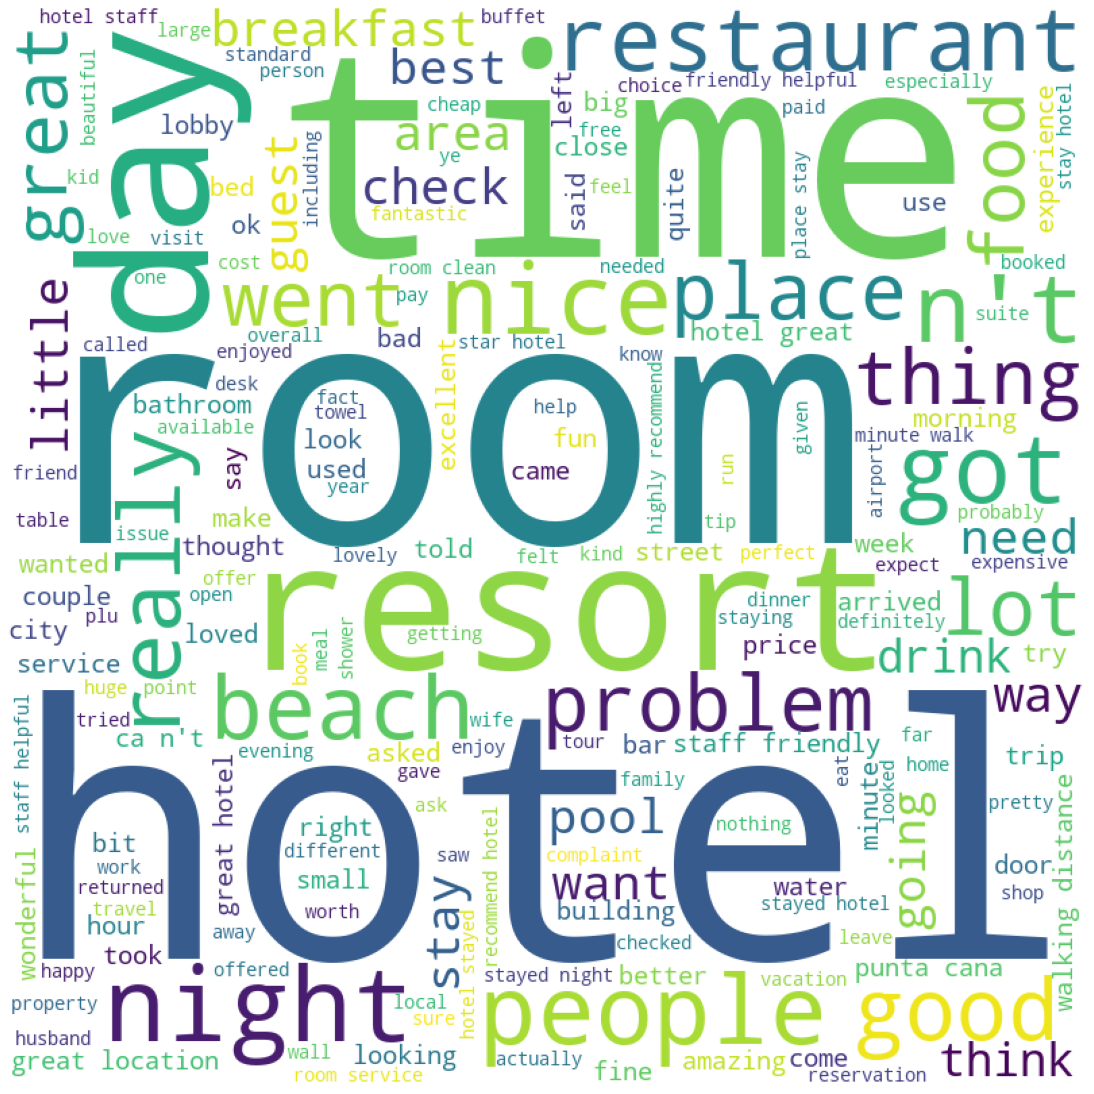

In [24]:
word_list = ''
for word in reviews['Review']:
    splited = word.lower()
    word_list +=splited
    
wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=stop_words,min_font_size=5).generate(word_list)
plt.figure(figsize = (25, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Exploring data after processing.

In [25]:
ex.box(reviews,x='Rating',y='Positive_Sentiment',notched=True,title='Rating Positive Sentiment Distributions')

In [26]:
ex.box(reviews,x='Rating',y='Negative_Sentiment',notched=True,title='Rating Positive Sentiment Distributions')

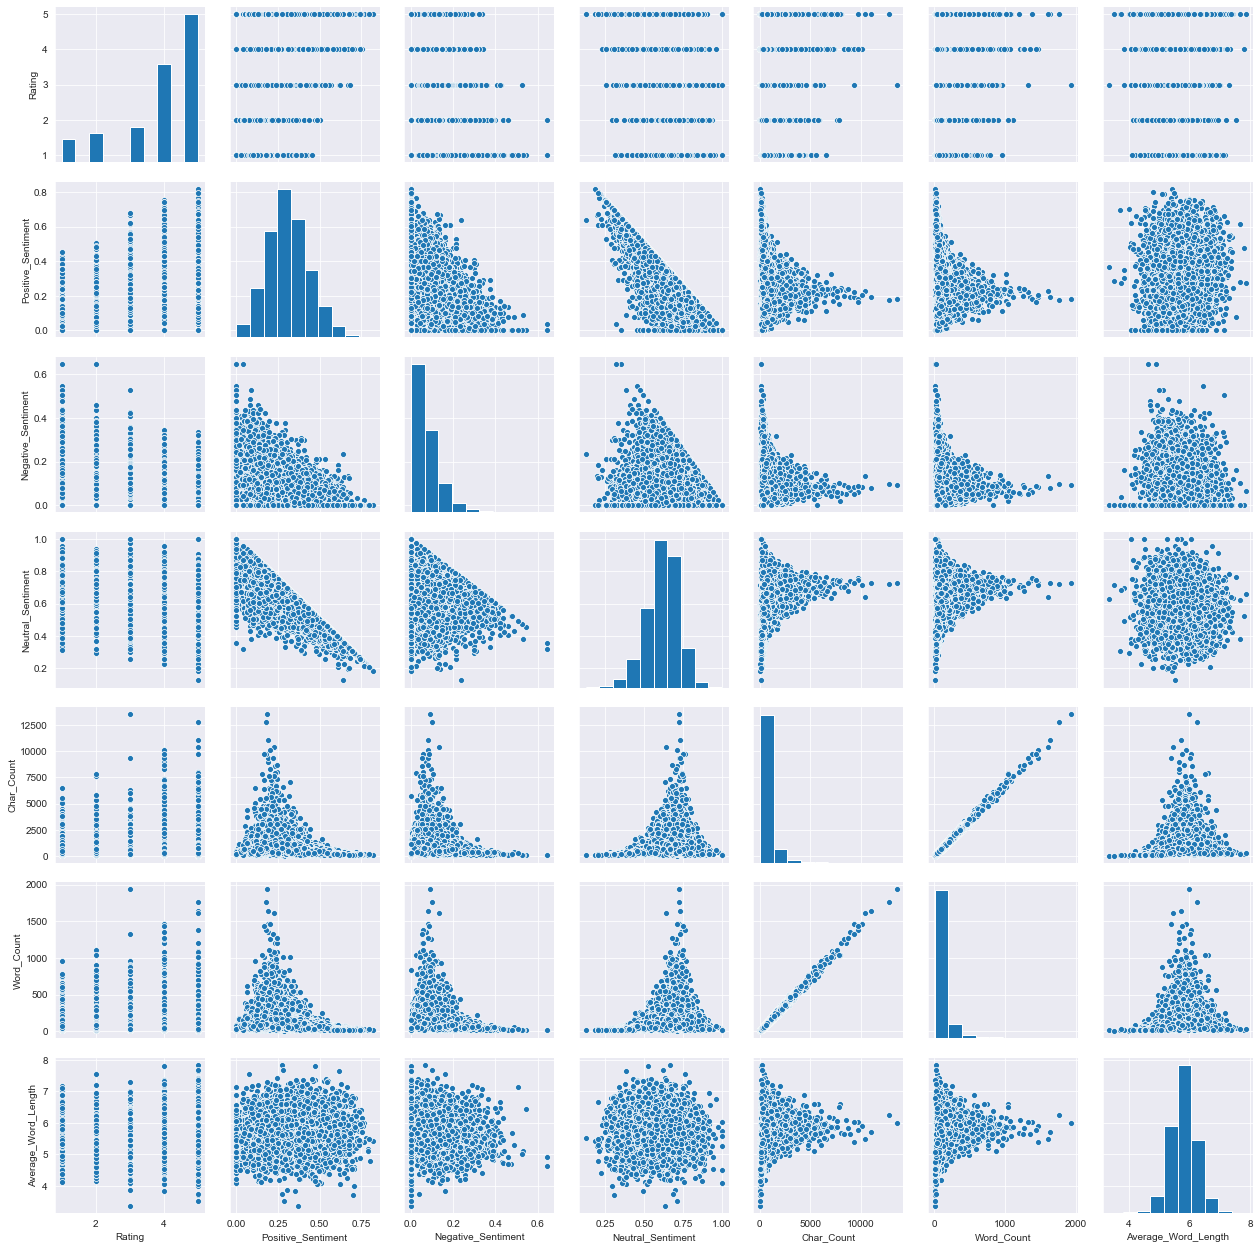

In [27]:
sns.pairplot(reviews)

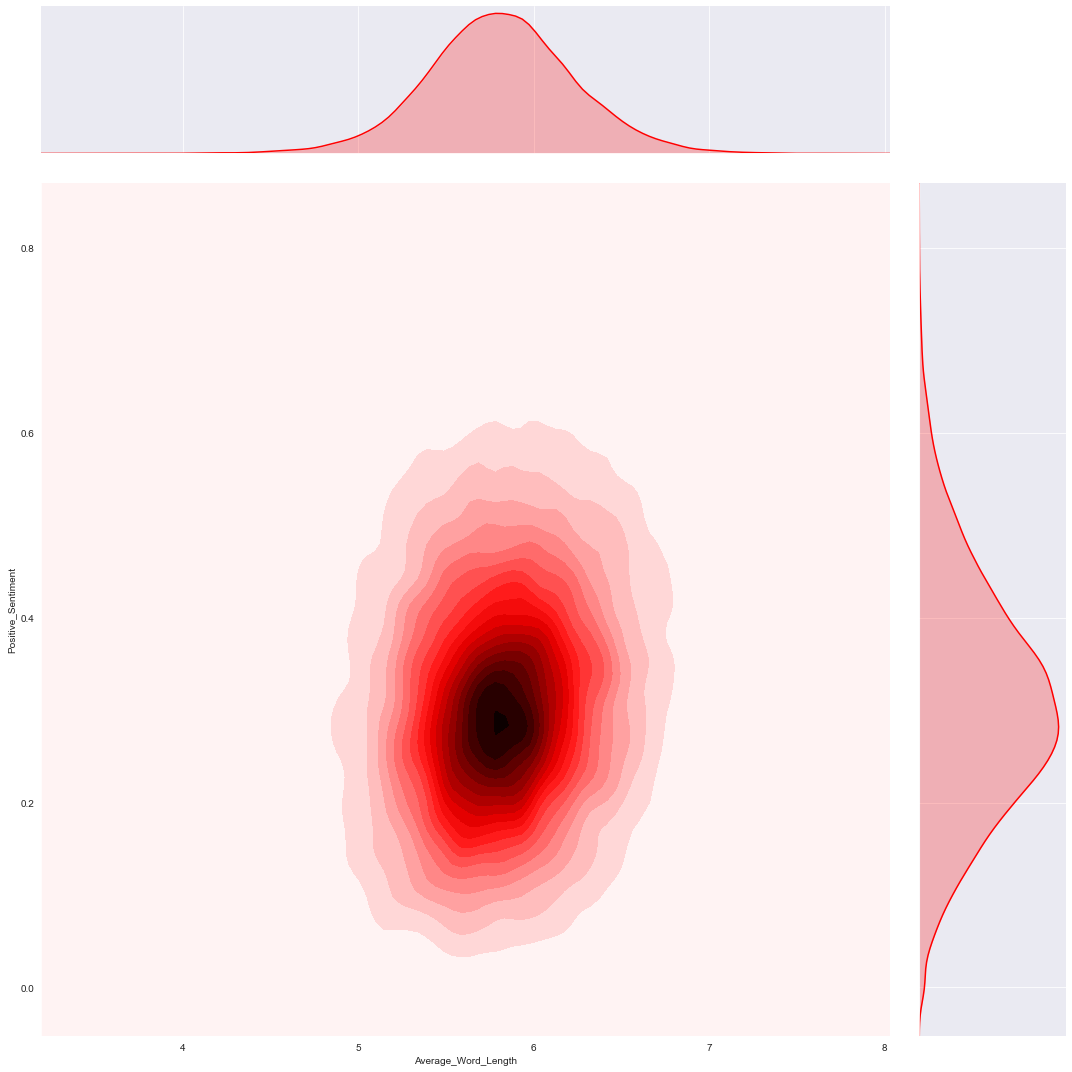

In [28]:
sns.jointplot(x=reviews['Average_Word_Length'],y=reviews['Positive_Sentiment'],height=15,kind='kde',levels=20,color='Red')

## It's important to check for outliers
##### Skewness and kurtosis for checking

In [29]:
data_info = reviews.describe()
data_info.loc['skew'] = reviews.skew()
data_info.loc['kurt'] = reviews.kurt()
data_info

Rating  Positive_Sentiment  Negative_Sentiment  \
count  20491.000000        20491.000000        20491.000000   
mean       3.952223            0.310376            0.071908   
std        1.233030            0.124714            0.065673   
min        1.000000            0.000000            0.000000   
25%        3.000000            0.226000            0.025000   
50%        4.000000            0.303000            0.059000   
75%        5.000000            0.388000            0.103000   
max        5.000000            0.818000            0.646000   
skew      -1.077219            0.316943            1.520012   
kurt       0.097704            0.110656            3.898627   

       Neutral_Sentiment    Char_Count    Word_Count  Average_Word_Length  
count       20491.000000  20491.000000  20491.000000         20491.000000  
mean            0.617716    724.896833    106.375043             5.809054  
std             0.101765    689.101024    100.655267             0.421113  
min             0.123000     44.000000      9.000000             3.363636  
25%             0.556000    339.000000     50.000000             5.540541  
50%             0.625000    537.000000     79.000000             5.805970  
75%             0.687000    859.000000    126.000000             6.074915  
max             1.000000  13501.000000   1933.000000             7.857143  
skew           -0.395471      4.521188      4.495935            -0.029201  
kurt            0.449477     39.166716     38.376201             0.726369

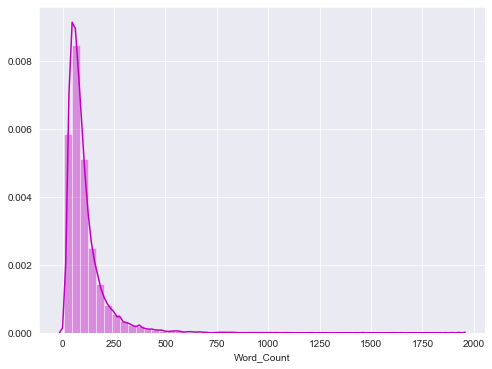

In [30]:
#Word count has highest kurtosis
plt.figure(figsize=(8,6))
sns.distplot(reviews['Word_Count'],color='m')

#### Checking for outlier and removing it.

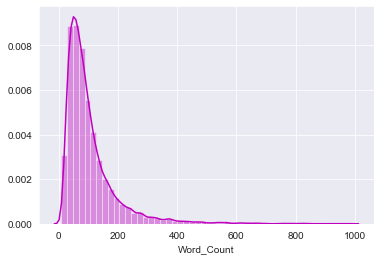

In [31]:
sns.distplot(reviews[reviews['Word_Count']<1000]['Word_Count'],color='m')

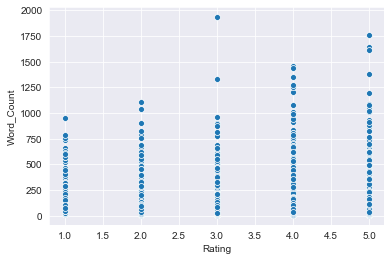

In [32]:
sns.scatterplot(y=reviews['Word_Count'],x=reviews['Rating'])

In [33]:
reviews = reviews[reviews['Word_Count']<1250]

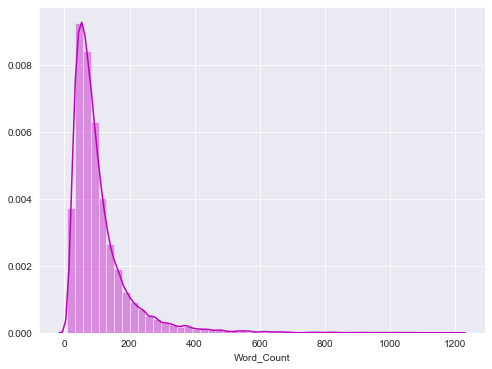

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(reviews['Word_Count'],color='m')

In [35]:
data_info.loc['skew'] = reviews.skew()
data_info.loc['kurt'] = reviews.kurt()
data_info

Rating  Positive_Sentiment  Negative_Sentiment  \
count  20491.000000        20491.000000        20491.000000   
mean       3.952223            0.310376            0.071908   
std        1.233030            0.124714            0.065673   
min        1.000000            0.000000            0.000000   
25%        3.000000            0.226000            0.025000   
50%        4.000000            0.303000            0.059000   
75%        5.000000            0.388000            0.103000   
max        5.000000            0.818000            0.646000   
skew      -1.076995            0.315976            1.520033   
kurt       0.096551            0.110788            3.896297   

       Neutral_Sentiment    Char_Count    Word_Count  Average_Word_Length  
count       20491.000000  20491.000000  20491.000000         20491.000000  
mean            0.617716    724.896833    106.375043             5.809054  
std             0.101765    689.101024    100.655267             0.421113  
min             0.123000     44.000000      9.000000             3.363636  
25%             0.556000    339.000000     50.000000             5.540541  
50%             0.625000    537.000000     79.000000             5.805970  
75%             0.687000    859.000000    126.000000             6.074915  
max             1.000000  13501.000000   1933.000000             7.857143  
skew           -0.394701      3.491957      3.468523            -0.029212  
kurt            0.450051     20.063896     19.536427             0.725443

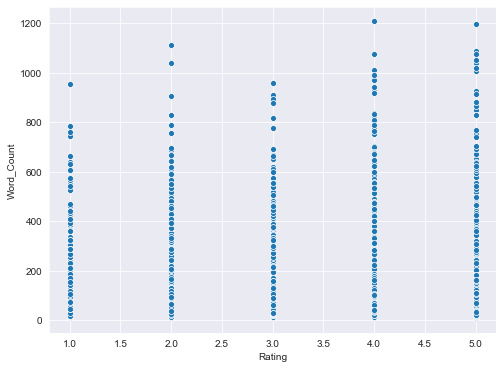

In [36]:
plt.figure(figsize=(8,6))

sns.scatterplot(y=reviews['Word_Count'],x=reviews['Rating'], palette='PuBu')

#### Now data is ready to feed into algorithm for predictions.
##### I will be using Linear Regression and RandomForestClassifier

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,confusion_matrix,classification_report,accuracy_score

In [39]:
X=reviews[['Positive_Sentiment','Negative_Sentiment','Word_Count','Average_Word_Length']]
y=reviews['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
pred = lr.predict(X_test)

In [43]:
print(classification_report(y_test,np.round(pred)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.74      0.08      0.14       402
         2.0       0.29      0.14      0.19       516
         3.0       0.22      0.41      0.28       667
         4.0       0.37      0.62      0.46      1783
         5.0       0.71      0.37      0.49      2776
         6.0       0.00      0.00      0.00         0

    accuracy                           0.41      6144
   macro avg       0.33      0.23      0.22      6144
weighted avg       0.52      0.41      0.41      6144



C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



In [44]:
rfc = RandomForestClassifier()

In [45]:
rfc.fit(X_train,y_train)

C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
pred=rfc.predict(X_test)

In [47]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [48]:
explained_variance_score(y_test,pred)

0.15910787161264817

In [49]:
mean_squared_error(y_test,pred)

1.24853515625

In [50]:
mean_absolute_error(y_test,pred)

0.74560546875

### We have fed data into algorithm and performance of our system is pretty good. But we can increase the accuracy by more feature engineering the data.

#### I have extracted more features out of the data in the next file and made predictions using more optimized algorithmn.